In [ ]:
# Set up Kaggle Environment
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-07-19 05:09:15--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-07-19 05:09:15 (83.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!kaggle datasets download -d vencerlanz09/pharmaceutical-drugs-and-vitamins-synthetic-images

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/pharmaceutical-drugs-and-vitamins-synthetic-images
License(s): CC-BY-SA-3.0
 81% 192M/238M [00:00<00:00, 637MB/s]  
100% 238M/238M [00:00<00:00, 591MB/s]


In [ ]:
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves,load_and_prep_image,compare_historys

In [ ]:
unzip_data('/content/pharmaceutical-drugs-and-vitamins-synthetic-images.zip')

# Dataset Overview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
walk_through_dir('/content/Drug Vision')

There are 1 directories and 0 images in '/content/Drug Vision'.
There are 10 directories and 0 images in '/content/Drug Vision/Data Combined'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Bactidol'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Medicol'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Neozep'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Kremil S'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Fish Oil'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Biogesic'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Bioflu'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/Alaxan'.
There are 0 directories and 1000 images in '/content/Drug Vision/Data Combined/DayZinc'.
There are 0 directories and 1000 images in '/content/Dr

In [ ]:
for i in os.walk('/content/Drug Vision'):
  print(i)

('/content/Drug Vision', ['Data Combined'], [])
('/content/Drug Vision/Data Combined', ['Bactidol', 'Medicol', 'Neozep', 'Kremil S', 'Fish Oil', 'Biogesic', 'Bioflu', 'Alaxan', 'DayZinc', 'Decolgen'], [])
('/content/Drug Vision/Data Combined/Bactidol', [], ['00000682.jpg', '00000982.jpg', '00000484.jpg', '00000199.jpg', '00000903.jpg', '00000388.jpg', '00000405.jpg', '00000428.jpg', '00000007.jpg', '00000800.jpg', '00000718.jpg', '00000931.jpg', '00000250.jpg', '00000609.jpg', '00000341.jpg', '00000305.jpg', '00000849.jpg', '00000789.jpg', '00000898.jpg', '00000900.jpg', '00000569.jpg', '00000181.jpg', '00000237.jpg', '00000587.jpg', '00000710.jpg', '00000008.jpg', '00000619.jpg', '00000677.jpg', '00000851.jpg', '00000398.jpg', '00000791.jpg', '00000213.jpg', '00000205.jpg', '00000083.jpg', '00000430.jpg', '00000247.jpg', '00000134.jpg', '00000042.jpg', '00000207.jpg', '00000101.jpg', '00000912.jpg', '00000400.jpg', '00000103.jpg', '00000108.jpg', '00000697.jpg', '00000700.jpg', '00000

In [ ]:
num_of_classes = len(os.listdir('/content/Drug Vision/Data Combined'))
num_of_classes

10

In [ ]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_classes):
  target_class = random.choice(target_classes)  # Choose a random class
  target_folder = os.path.join(target_dir, target_class)
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(os.path.join(target_folder, random_image[0]))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape is {img.shape}')
  return img

Image shape is (300, 300, 3)


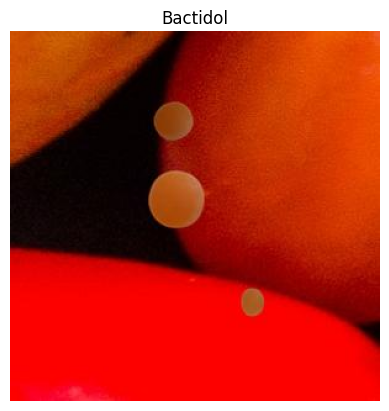

In [ ]:
# target_dir is the path of the dataset
target_dir = '/content/Drug Vision/Data Combined'
img = view_random_image(target_dir=target_dir,target_classes=os.listdir(target_dir))

In [ ]:
img/255

array([[[0.79215686, 0.30196078, 0.        ],
        [0.81176471, 0.32156863, 0.00784314],
        [0.82352941, 0.33333333, 0.01960784],
        ...,
        [0.92941176, 0.34117647, 0.14117647],
        [0.9254902 , 0.34509804, 0.15686275],
        [0.92941176, 0.34901961, 0.16862745]],

       [[0.79215686, 0.30196078, 0.        ],
        [0.80392157, 0.31372549, 0.        ],
        [0.80392157, 0.31372549, 0.        ],
        ...,
        [0.94509804, 0.35686275, 0.15686275],
        [0.9372549 , 0.35686275, 0.16862745],
        [0.9372549 , 0.35686275, 0.17647059]],

       [[0.79607843, 0.30588235, 0.        ],
        [0.80392157, 0.31372549, 0.        ],
        [0.8       , 0.30980392, 0.        ],
        ...,
        [0.95294118, 0.36470588, 0.15686275],
        [0.94509804, 0.36862745, 0.16862745],
        [0.94509804, 0.36470588, 0.17647059]],

       ...,

       [[0.99215686, 0.00392157, 0.        ],
        [0.99215686, 0.00392157, 0.        ],
        [0.99215686, 0

# Fitting the Model

In [ ]:
dir = '/content/Drug Vision/Data Combined'
IMG_SIZE = (224,224)
BATCH_SIZE = 32

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Divide dataset images into train and test subsets
train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               subset='training')

test_data = test_datagen.flow_from_directory(directory=dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               subset='validation')

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Create train and valid directories
os.makedirs('/content/Drug Vision/train',exist_ok=True)
os.makedirs('/content/Drug Vision/test',exist_ok=True)

In [ ]:
import shutil

train_dir = '/content/Drug Vision/train'
test_dir = '/content/Drug Vision/test'

# Copy images splitted for training to the train folder
for file in train_data.filenames:
  class_name = file.split('/')[0]  # each class name
  file_name = file.split('/')[1]   # each file name
  src = os.path.join(dir, class_name, file_name)  # the path of an original file
  train_target_dir = os.path.join(train_dir, class_name)
  os.makedirs(train_target_dir, exist_ok=True)
  train = os.path.join(train_target_dir, file_name)
  shutil.copy2(src, train)

# Copy images splitted for testing to the test folder
for file in test_data.filenames:
  class_name = file.split('/')[0]  # each class name
  file_name = file.split('/')[1]   # each file name
  src = os.path.join(dir, class_name, file_name)  # the path of an original file
  test_target_dir = os.path.join(test_dir, class_name)
  os.makedirs(test_target_dir, exist_ok=True)
  test = os.path.join(test_target_dir, file_name)
  shutil.copy2(src, test)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, strides=2, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
# Set up the checpoint path
checkpoint_path = 'pharmaceutical_drugs_and_vitamins_checpoints/model_checkpoint.weights.h5'

# Create a ModelCheckpoint callback that saves only the model's weights
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                               save_best_only=True,
                                               save_weights_only=True, # saves only the best model weights
                                               save_freq='epoch', # saves every epoch
                                               monitor='val_accuracy',
                                               mode='max')

model_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[model_ckp, model_es])

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step - accuracy: 0.1071 - loss: 2.4391 - val_accuracy: 0.0995 - val_loss: 2.3140
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.1383 - loss: 2.3316 - val_accuracy: 0.1095 - val_loss: 2.3042
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.1646 - loss: 2.2553 - val_accuracy: 0.1350 - val_loss: 2.2366
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.2071 - loss: 2.1644 - val_accuracy: 0.2400 - val_loss: 2.1244
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.2511 - loss: 2.0616 - val_accuracy: 0.2545 - val_loss: 2.0595


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,175,520 (4.48 MB)

 Trainable params: 391,626 (1.49 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 783,254 (2.99 MB)

In [ ]:
model_1.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2616 - loss: 2.0595


[2.0595264434814453, 0.25450000166893005]

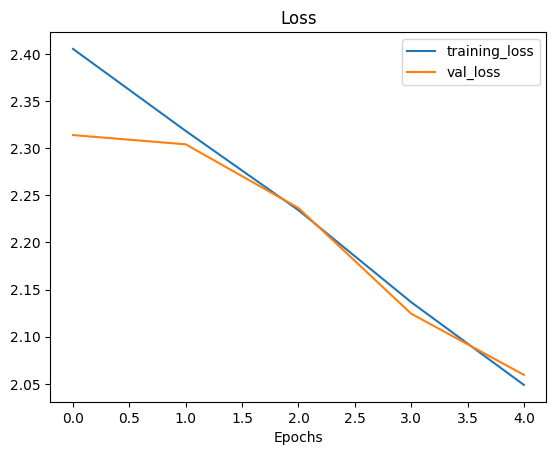

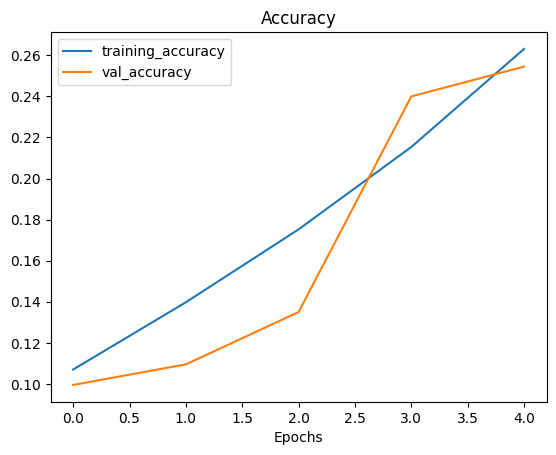

In [ ]:
plot_loss_curves(history_1)

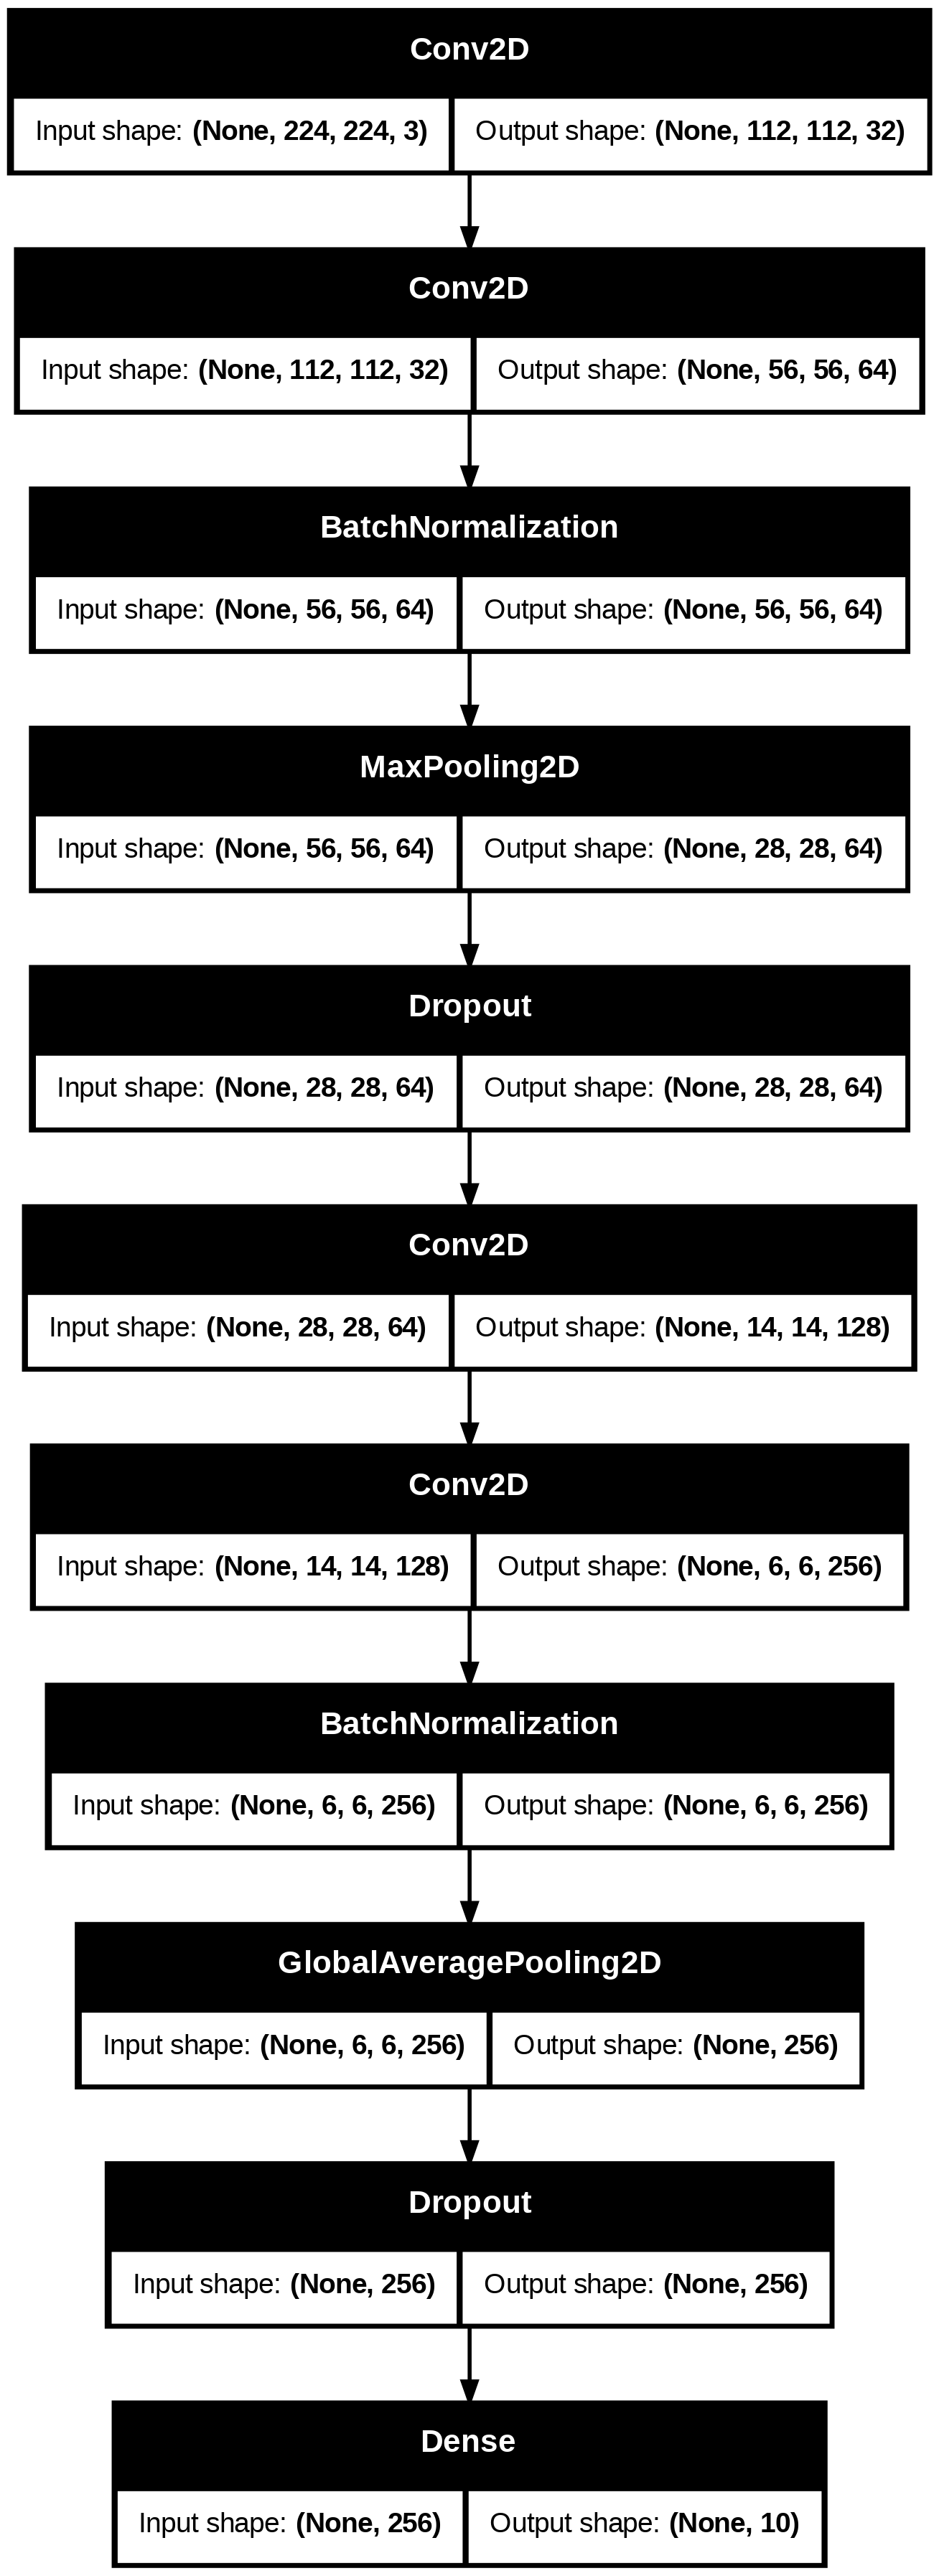

In [ ]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

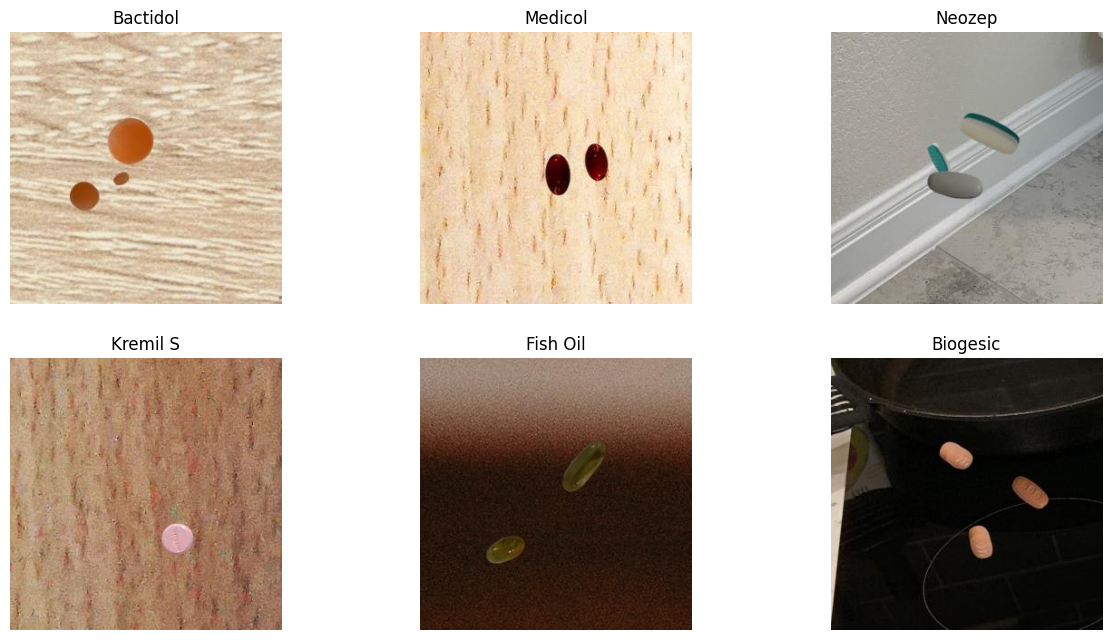

In [ ]:
# Display a random picture from each class
all_classes = os.listdir(train_dir)
images = []

for class_name in all_classes[:10]:
  class_path = os.path.join(train_dir, class_name)
  class_images = os.listdir(class_path)
  random_img = random.choice(class_images)
  img_path = os.path.join(class_path, random_img)
  img = mpimg.imread(img_path)
  images.append((class_name, img))

# Visualize a random image of 6 classes with subplots
plt.figure(figsize=(15, 12))
for i in range(min(6, len(images))):
  plt.subplot(3, 3, i+1)
  plt.imshow(images[i][1])
  plt.title(images[i][0])
  plt.axis('off')
plt.show();

# Preprocessing

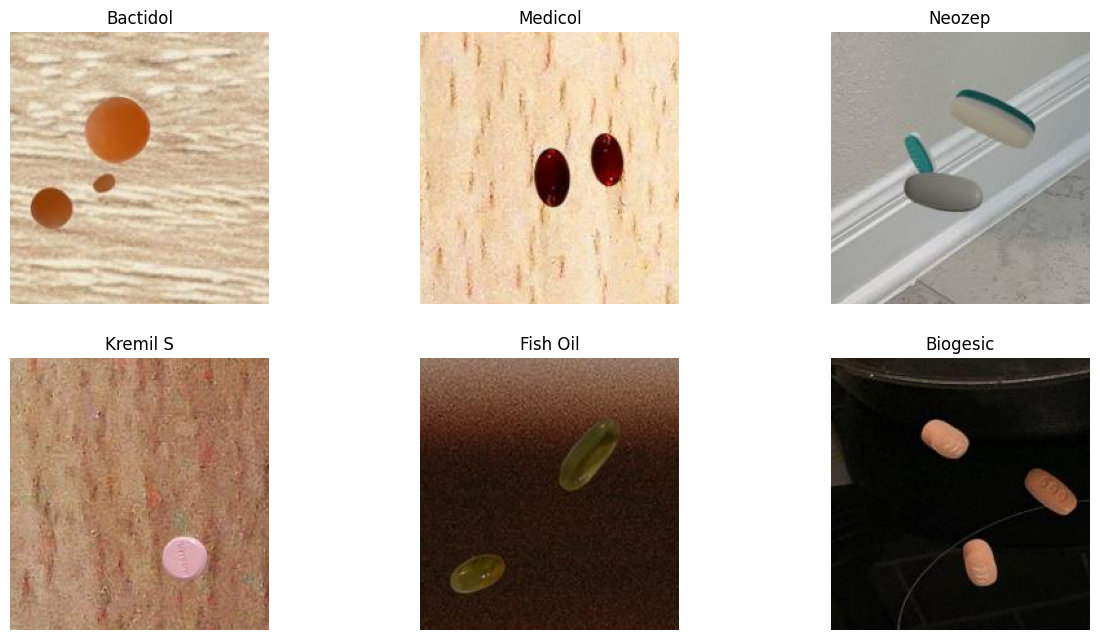

In [ ]:
plt.figure(figsize=(15, 12))
for i in range(min(6, len(images))):
  img = tf.convert_to_tensor(images[i][1]) # Convert image into a tensor
  image = tf.keras.layers.CenterCrop(height=210,width=200)(img)
  image = tf.keras.layers.Rescaling(scale=1/255.)(image)
  plt.subplot(3, 3, i+1)
  plt.imshow(image.numpy())
  plt.title(images[i][0])
  plt.axis('off')
plt.show();

In [ ]:
image.shape

TensorShape([210, 200, 3])

In [ ]:
image = tf.squeeze(image)
image = tf.expand_dims(image, axis=0)
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32,kernel_size=3)
fmaps = conv_layer(image)

In [ ]:
fmaps.shape

TensorShape([1, 208, 198, 32])

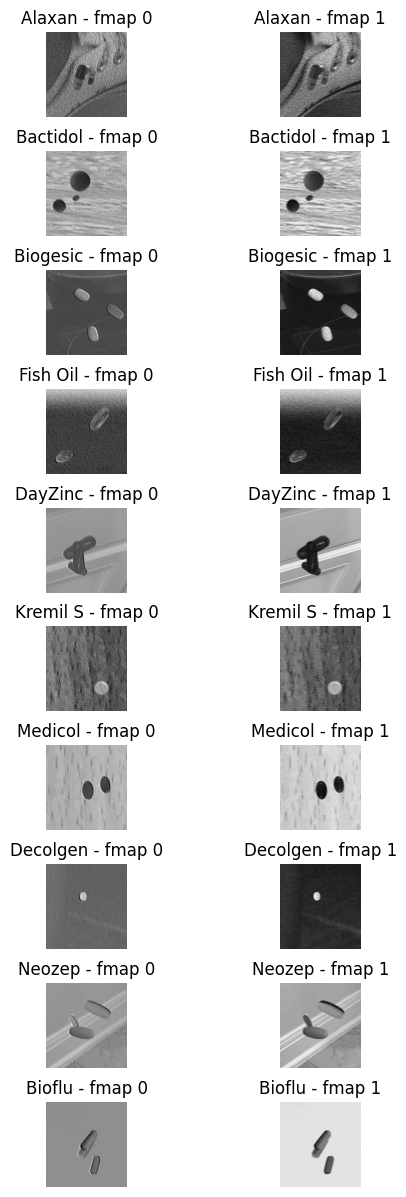

In [ ]:
# List of images: images = [(label, image_tensor), ...]
# Select one random image from each of the 6 classes
class_names = list(set([img[0] for img in images]))
selected_images = []

# Assuming 6 unique classes are already selected – choose 1 image per class
for class_name in class_names:
    class_images = [img_tuple for img_tuple in images if img_tuple[0] == class_name]
    if class_images:  # Add a random image if available
        selected_images.append(random.choice(class_images))

# Define a Conv2D layer (for testing feature maps)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=3)

# Subplot setup: 2 feature maps per class → 6x2 = 12 subplots
num_classes = len(selected_images)
fig, axes = plt.subplots(num_classes, 2, figsize=(6, 15))  # Reduced figure size for compact view
axes = axes.flatten()  # Flatten 2D subplot grid for easier indexing

plot_idx = 0
for img_data in selected_images:
    label = img_data[0]
    img = tf.convert_to_tensor(img_data[1])

    # If the image is grayscale, convert it to 3 channels
    if len(img.shape) == 2:
        img = tf.expand_dims(img, axis=-1)
        img = tf.concat([img, img, img], axis=-1)

    if img.shape[-1] != 3:
        img = img[:, :, :3]  # If RGBA or other, keep only RGB

    # Preprocessing: crop center, normalize, and add batch dimension
    image = tf.keras.layers.CenterCrop(210, 200)(img)
    image = tf.keras.layers.Rescaling(1/255.)(image)
    image = tf.expand_dims(image, axis=0)  # Add batch size for Conv2D input

    # Extract feature maps
    fmaps = conv_layer(image)

    # Display 2 feature maps (fmap 0 and fmap 1)
    for fmap_idx in (0, 1):
        axes[plot_idx].imshow(fmaps[0, :, :, fmap_idx], cmap='gray')
        axes[plot_idx].set_title(f"{label} - fmap {fmap_idx}")
        axes[plot_idx].axis('off')
        plot_idx += 1

# Reduce spacing between columns and rows
plt.subplots_adjust(wspace=0.01, hspace=0.4)
plt.show()

In [ ]:
def conv_output_size(input_size, kernel_size, strides=1, padding='valid'):
    if padding == 'valid':
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:  # SAME
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

out_h, pad_h = conv_output_size(150, kernel_size=7, strides=2, padding='same')
out_w, pad_w = conv_output_size(200, kernel_size=7, strides=2, padding='same')
print(out_h, out_w)

75 100


In [ ]:
tf.random.set_seed(42)
filters = tf.random.normal([7, 7, 3, 2])
biases = tf.zeros([2])
fmaps_manual = tf.nn.conv2d(image, filters, strides=1, padding='SAME') + biases
print(fmaps_manual.shape)

(1, 210, 200, 2)


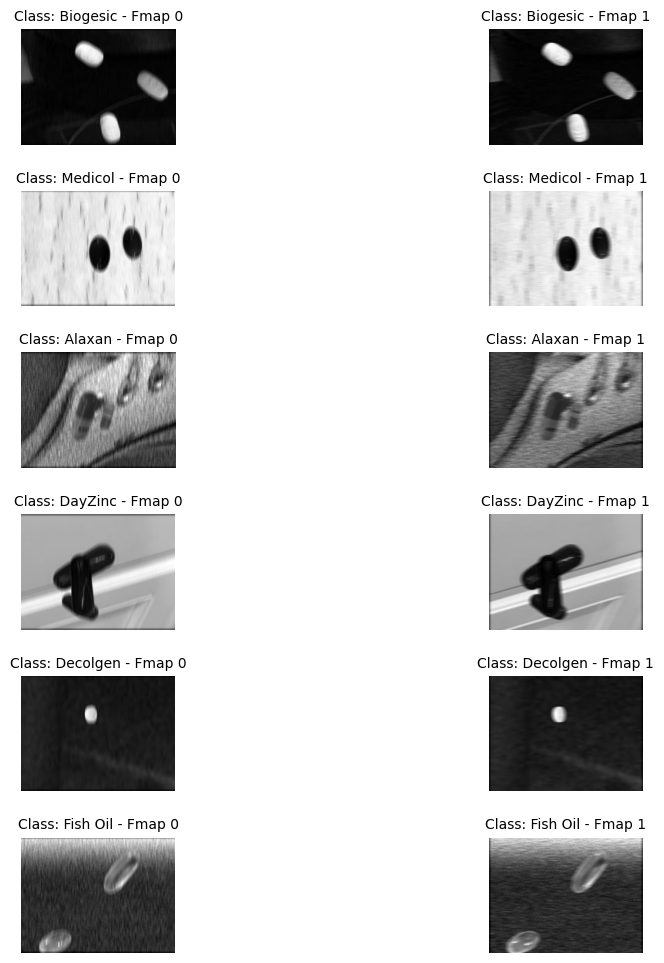

In [ ]:
random.shuffle(images)
selected_images = images[:6]

plt.figure(figsize=(12, 12))

# Custom filter setup
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1  # Vertical line
filters[3, :, :, 1] = 1  # Horizontal line
biases = tf.zeros([2])

for i, (label, img_tensor) in enumerate(selected_images):
    img = tf.keras.layers.CenterCrop(150, 200)(img_tensor)
    img = tf.keras.layers.Rescaling(1/255.)(img)
    image = tf.expand_dims(tf.squeeze(img), axis=0)

    # Apply convolution
    fmaps_custom = tf.nn.conv2d(image, filters, strides=1, padding='SAME') + biases

    for fmap_idx in (0, 1):
        plt.subplot(6, 2, i * 2 + fmap_idx + 1)
        plt.imshow(fmaps_custom[0, :, :, fmap_idx], cmap='gray')
        plt.title(f"Class: {label} - Fmap {fmap_idx}", fontsize=10)
        plt.axis('off')

# Adjust spacing manually
plt.subplots_adjust(wspace=0.01, hspace=0.4)
plt.show()

# Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

# Transfer Learning

# InceptionV3 Petrained Model

In [ ]:
# Set up the input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.InceptionV3(include_top=False,
                                               input_shape=input_shape,
                                               weights='imagenet')
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name='input_layer')

# Apply data augmentation directly to the inputs with the original size
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = int(0.25 * len(train_data)),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.2104 - loss: 2.3412 - val_accuracy: 0.5083 - val_loss: 1.4832
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 660ms/step - accuracy: 0.4857 - loss: 1.5189 - val_accuracy: 0.5625 - val_loss: 1.2602
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 660ms/step - accuracy: 0.5684 - loss: 1.2742 - val_accuracy: 0.6438 - val_loss: 1.1114
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 659ms/step - accuracy: 0.5906 - loss: 1.1847 - val_accuracy: 0.6208 - val_loss: 1.0548
Epoch 5/5
 2/62 ━━━━━━━━━━━━━━━━━━━━ 28s 478ms/step - accuracy: 0.5078 - loss: 1.3103

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5154 - loss: 1.3321 - val_accuracy: 0.6542 - val_loss: 0.9983


In [ ]:
model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, None, None,     │    21,802,784 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,864,256 (83.41 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 40,982 (160.09 KB)

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5

history_data_aug_2 = model_2.fit(train_data,
                                 epochs=initial_epochs,
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[model_ckp,model_es])

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 417ms/step - accuracy: 0.6073 - loss: 1.1377 - val_accuracy: 0.7042 - val_loss: 0.9274
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 342ms/step - accuracy: 0.6476 - loss: 1.0212 - val_accuracy: 0.6646 - val_loss: 0.9518
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 132s 303ms/step - accuracy: 0.6831 - loss: 0.9141 - val_accuracy: 0.6812 - val_loss: 0.9097
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 304ms/step - accuracy: 0.6908 - loss: 0.9003 - val_accuracy: 0.6854 - val_loss: 0.9080
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 330ms/step - accuracy: 0.7001 - loss: 0.8655 - val_accuracy: 0.7542 - val_loss: 0.7998


In [ ]:
results_data_aug_2 = model_2.evaluate(test_data)
results_data_aug_2

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.7304 - loss: 0.7994


[0.7878707647323608, 0.737500011920929]

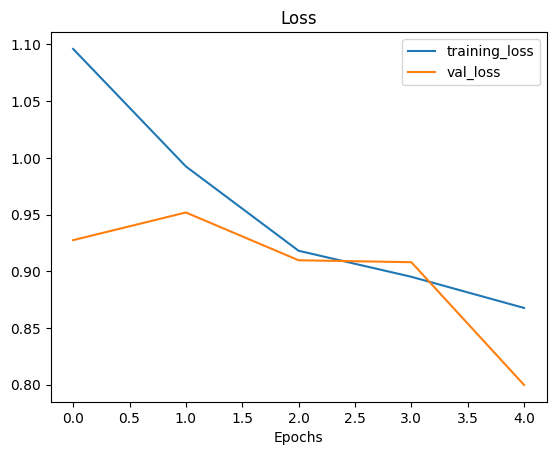

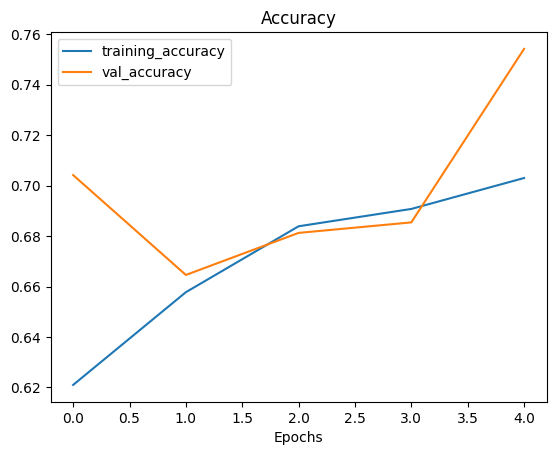

In [ ]:
plot_loss_curves(history_data_aug_2)

# MobileNet Petrained Model

In [ ]:
# Set up the input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV2(include_top=False,
                                               input_shape=input_shape,
                                               weights='imagenet')
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name='input_layer')

# Apply data augmentation directly to the inputs with the original size
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_3 = tf.keras.Model(inputs, outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = int(0.25 * len(train_data)),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 430ms/step - accuracy: 0.2231 - loss: 2.2948 - val_accuracy: 0.5375 - val_loss: 1.3908
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.5592 - loss: 1.3315 - val_accuracy: 0.6146 - val_loss: 1.0994
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.6570 - loss: 1.0556 - val_accuracy: 0.6667 - val_loss: 0.9918
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 246ms/step - accuracy: 0.6900 - loss: 0.9724 - val_accuracy: 0.6958 - val_loss: 0.9229
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6870 - loss: 0.9530 - val_accuracy: 0.6896 - val_loss: 0.9261


In [ ]:
model_3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, None, None,     │     2,257,984 │
│ (Functional)                    │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,296,416 (8.76 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 25,622 (100.09 KB)

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5

history_data_aug_3 = model_3.fit(train_data,
                                 epochs=initial_epochs,
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[model_ckp,model_es])

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 223ms/step - accuracy: 0.7214 - loss: 0.8671 - val_accuracy: 0.7688 - val_loss: 0.7009
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.7498 - loss: 0.7562 - val_accuracy: 0.7708 - val_loss: 0.7338
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.7640 - loss: 0.7115 - val_accuracy: 0.7646 - val_loss: 0.6770
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.7902 - loss: 0.6357 - val_accuracy: 0.7896 - val_loss: 0.6219
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.7887 - loss: 0.6237 - val_accuracy: 0.7812 - val_loss: 0.6176


In [ ]:
results_data_aug_3 = model_3.evaluate(test_data)
results_data_aug_3

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.7968 - loss: 0.6163


[0.6133482456207275, 0.7940000295639038]

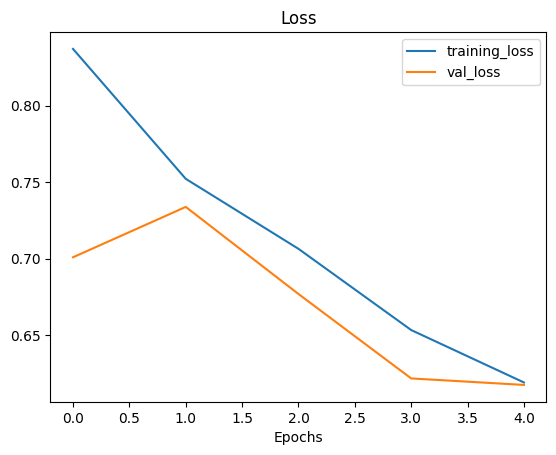

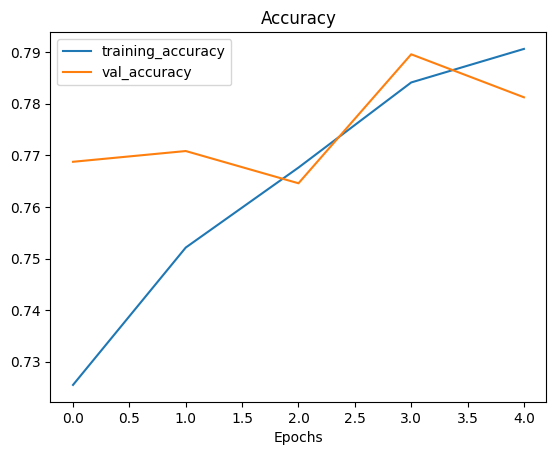

In [ ]:
plot_loss_curves(history_data_aug_3)

# EfficientNet Petrained Model

In [ ]:
# Set up the input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False,
                                                    input_shape=input_shape,
                                                    weights='imagenet')
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name='input_layer')

# Apply data augmentation directly to the inputs with the original size
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_4 = tf.keras.Model(inputs, outputs)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = int(0.25 * len(train_data)),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 404ms/step - accuracy: 0.0977 - loss: 2.3501 - val_accuracy: 0.0979 - val_loss: 2.3079
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.0939 - loss: 2.3291 - val_accuracy: 0.1021 - val_loss: 2.3840
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.0893 - loss: 2.3359 - val_accuracy: 0.1083 - val_loss: 2.3256
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - accuracy: 0.0955 - loss: 2.3530 - val_accuracy: 0.1021 - val_loss: 2.3272
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0938 - loss: 2.3624 - val_accuracy: 0.1125 - val_loss: 2.3067


In [ ]:
model_4.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5

history_data_aug_4 = model_4.fit(train_data,
                                 epochs=initial_epochs,
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[model_ckp,model_es])

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.0914 - loss: 2.3303 - val_accuracy: 0.1000 - val_loss: 2.3496
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - accuracy: 0.1052 - loss: 2.3292 - val_accuracy: 0.1063 - val_loss: 2.3302
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 173ms/step - accuracy: 0.1022 - loss: 2.3379 - val_accuracy: 0.1146 - val_loss: 2.3115
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.1012 - loss: 2.3369 - val_accuracy: 0.0750 - val_loss: 2.3507
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.1003 - loss: 2.3327 - val_accuracy: 0.1021 - val_loss: 2.3295


In [ ]:
results_data_aug_4 = model_4.evaluate(test_data)
results_data_aug_4

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.1033 - loss: 2.3209


[2.3223836421966553, 0.09650000184774399]

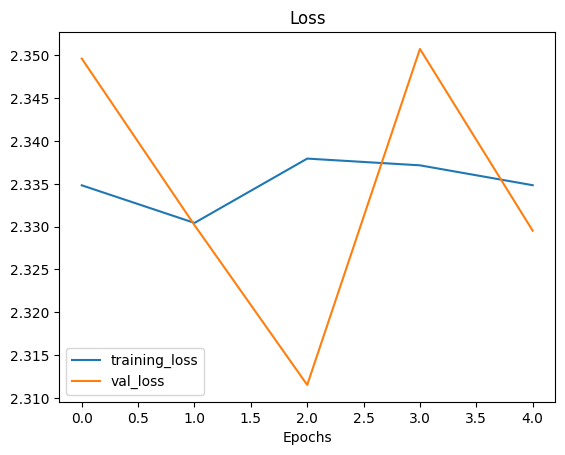

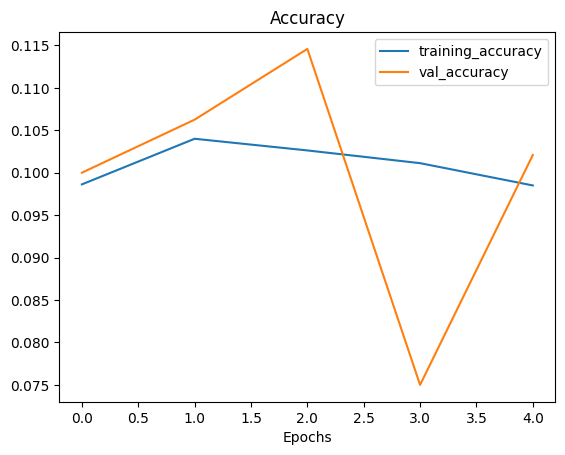

In [ ]:
plot_loss_curves(history_data_aug_4)

# Fine Tunning

In [ ]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Functional name=inception_v3, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 0 | Layer name: input_layer | Trainable? True
Layer number: 1 | Layer name: sequential_1 | Trainable? True
Layer number: 2 | Layer name: inception_v3 | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 4 | Layer name: output_layer | Trainable? True


In [ ]:
# Access the base model layers of model_3
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'inception_v3'

In [ ]:
model_2_base_model.trainable = False

In [ ]:
# How many layers are trainable in our model_2_base_model
print(len(model_2_base_model.trainable_variables))

0


In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 sequential_1 True
2 inception_v3 False
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
# Make all the layers in model_2_base_model trainable
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_1 False
1 conv2d_6 False
2 batch_normalization_2 False
3 activation False
4 conv2d_7 False
5 batch_normalization_3 False
6 activation_1 False
7 conv2d_8 False
8 batch_normalization_4 False
9 activation_2 False
10 max_pooling2d_1 False
11 conv2d_9 False
12 batch_normalization_5 False
13 activation_3 False
14 conv2d_10 False
15 batch_normalization_6 False
16 activation_4 False
17 max_pooling2d_2 False
18 conv2d_14 False
19 batch_normalization_10 False
20 activation_8 False
21 conv2d_12 False
22 conv2d_15 False
23 batch_normalization_8 False
24 batch_normalization_11 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_11 False
29 conv2d_13 False
30 conv2d_16 False
31 conv2d_17 False
32 batch_normalization_7 False
33 batch_normalization_9 False
34 batch_normalization_12 False
35 batch_normalization_13 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_21 False
42 batch_no

In [ ]:
print(len(model_2.trainable_variables))

3


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_fine_data_aug_2 = model_2.fit(train_data,
                                      epochs=fine_tune_epochs,
                                      validation_data=test_data,
                                      initial_epoch=history_data_aug_2.epoch[-1],
                                      validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 234ms/step - accuracy: 0.7365 - loss: 0.8011 - val_accuracy: 0.7792 - val_loss: 0.7034
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.7374 - loss: 0.7628 - val_accuracy: 0.7437 - val_loss: 0.7772
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step - accuracy: 0.7308 - loss: 0.7800 - val_accuracy: 0.7500 - val_loss: 0.7572
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step - accuracy: 0.7369 - loss: 0.7651 - val_accuracy: 0.7375 - val_loss: 0.7262
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.7427 - loss: 0.7654 - val_accuracy: 0.7458 - val_loss: 0.7695
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 180ms/step - accuracy: 0.7345 - loss: 0.7779 - val_accuracy: 0.7417 - val_loss: 0.7837


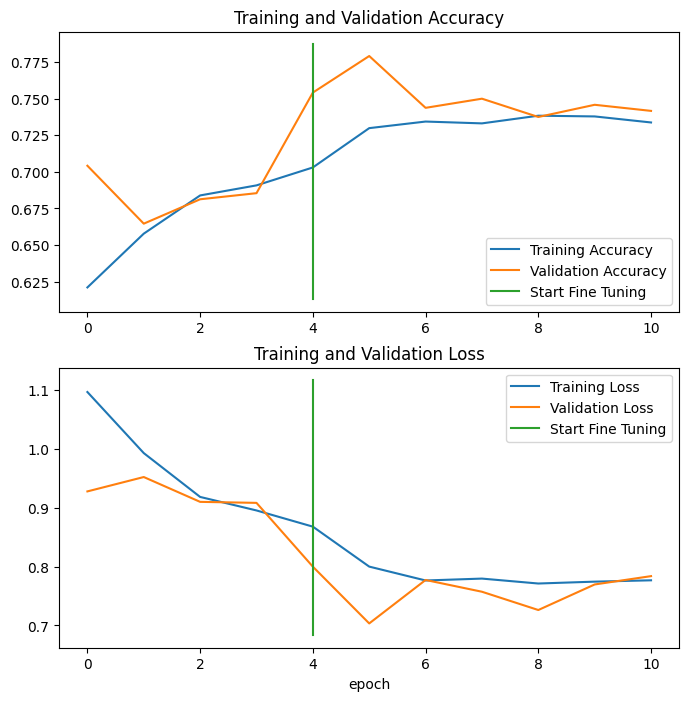

In [ ]:
compare_historys(original_history=history_data_aug_2,
                 new_history=history_fine_data_aug_2,
                 initial_epochs=5)

In [ ]:
model_3.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Functional name=mobilenetv2_1.00_224, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [ ]:
for layer_number, layer in enumerate(model_3.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 0 | Layer name: input_layer | Trainable? True
Layer number: 1 | Layer name: sequential_1 | Trainable? True
Layer number: 2 | Layer name: mobilenetv2_1.00_224 | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 4 | Layer name: output_layer | Trainable? True


In [ ]:
# Access the base model layers of model_3
model_3_base_model = model_3.layers[2]
model_3_base_model.name

'mobilenetv2_1.00_224'

In [ ]:
model_3_base_model.trainable = False

In [ ]:
# How many layers are trainable in our model_3_base_model
print(len(model_3_base_model.trainable_variables))

0


In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 sequential_1 True
2 mobilenetv2_1.00_224 False
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
# Make all the layers in model_3_base_model trainable
model_3_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_3_base_model.layers[:-10]:
  layer.trainable = False

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model_3_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_3 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_

In [ ]:
print(len(model_3.trainable_variables))

13


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_fine_data_aug_3 = model_3.fit(train_data,
                                      epochs=fine_tune_epochs,
                                      validation_data=test_data,
                                      initial_epoch=history_data_aug_3.epoch[-1],
                                      validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 154ms/step - accuracy: 0.7340 - loss: 0.7827 - val_accuracy: 0.7500 - val_loss: 0.7691
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.8046 - loss: 0.5836 - val_accuracy: 0.7396 - val_loss: 0.7888
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.8264 - loss: 0.5090 - val_accuracy: 0.7250 - val_loss: 0.8552
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.8323 - loss: 0.4777 - val_accuracy: 0.7625 - val_loss: 0.7278
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.8457 - loss: 0.4472 - val_accuracy: 0.8000 - val_loss: 0.6347
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.8570 - loss: 0.4336 - val_accuracy: 0.7708 - val_loss: 0.7330


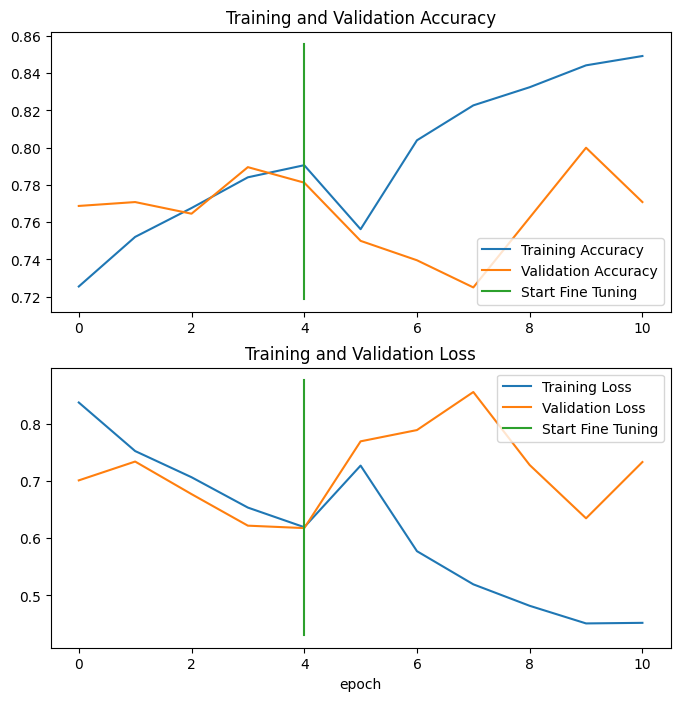

In [ ]:
compare_historys(original_history=history_data_aug_3,
                 new_history=history_fine_data_aug_3,
                 initial_epochs=5)

In [ ]:
model_4.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [ ]:
for layer_number, layer in enumerate(model_4.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 0 | Layer name: input_layer | Trainable? True
Layer number: 1 | Layer name: sequential_1 | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 4 | Layer name: output_layer | Trainable? True


In [ ]:
# Access the base model layers of model_4
model_4_base_model = model_4.layers[2]
model_4_base_model.name

'efficientnetv2-b0'

In [ ]:
model_4_base_model.trainable = False

In [ ]:
# How many layers are trainable in our model_4_base_model
print(len(model_4_base_model.trainable_variables))

0


In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_4.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 sequential_1 True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
# Make all the layers in model_4_base_model trainable
model_4_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_4_base_model.layers[:-10]:
  layer.trainable = False

model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model_4_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_4 False
1 rescaling_22 False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwc

In [ ]:
print(len(model_4.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_fine_data_aug_4 = model_4.fit(train_data,
                                      epochs=fine_tune_epochs,
                                      validation_data=test_data,
                                      initial_epoch=history_data_aug_4.epoch[-1],
                                      validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 168ms/step - accuracy: 0.0912 - loss: 2.3302 - val_accuracy: 0.0979 - val_loss: 2.3361
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.0964 - loss: 2.3174 - val_accuracy: 0.1125 - val_loss: 2.3107
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.1103 - loss: 2.3112 - val_accuracy: 0.0958 - val_loss: 2.3263
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.0985 - loss: 2.3098 - val_accuracy: 0.1083 - val_loss: 2.3327
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 164ms/step - accuracy: 0.1017 - loss: 2.3126 - val_accuracy: 0.0958 - val_loss: 2.3250
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - accuracy: 0.0961 - loss: 2.3167 - val_accuracy: 0.1063 - val_loss: 2.3120


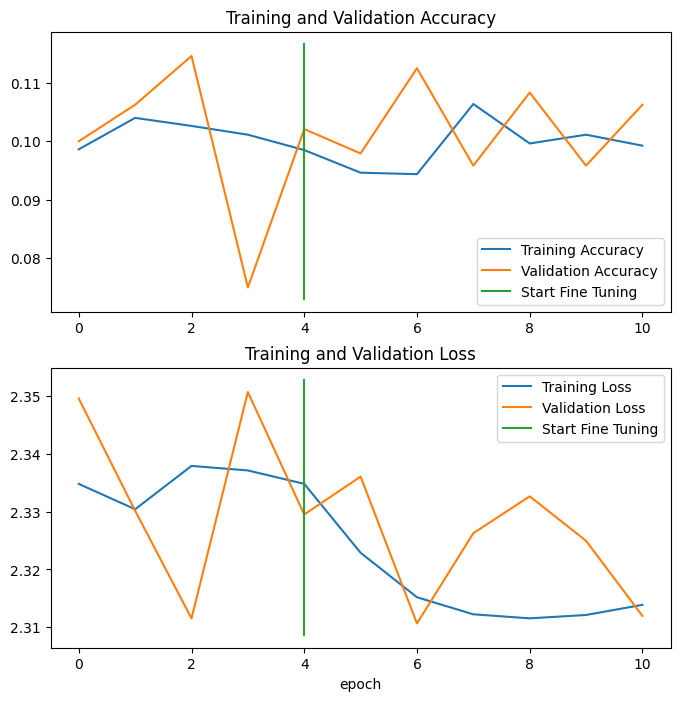

In [ ]:
compare_historys(original_history=history_data_aug_4,
                 new_history=history_fine_data_aug_4,
                 initial_epochs=5)

# VLM (Vision Language Models)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/Drug Vision/train/",
    image_size=(224, 224),
    label_mode='int', # integer labels
    batch_size=8
)

Found 8000 files belonging to 10 classes.


In [ ]:
# Class names for Caption Generation
train_class_names = train_dataset.class_names
train_class_names

['Alaxan',
 'Bactidol',
 'Bioflu',
 'Biogesic',
 'DayZinc',
 'Decolgen',
 'Fish Oil',
 'Kremil S',
 'Medicol',
 'Neozep']

In [ ]:
# Map integer labels into text caption
def map_text_caption(image, label):
  # Map tensor labels to class names using tf.gather
  caption = tf.gather(tf.constant(class_names), label)
  # Construct the caption string within the TensorFlow graph
  caption_string = tf.strings.join(['It\'s a photo of ', caption])
  return image, caption_string

In [ ]:
train_dataset_with_text = train_dataset.map(map_text_caption)

In [ ]:
# OpenAI CLIP TensorFlow model
!pip install keras-vis

In [ ]:
from transformers import CLIPProcessor, TFCLIPModel
from PIL import Image

vm_model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
vm_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

tf_model.h5:   0%|          | 0.00/606M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFCLIPModel.

All the layers of TFCLIPModel were initialized from the model checkpoint at openai/clip-vit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# Convert images into NumPy array, then fed into CLIP
train_image_paths = []
train_captions = []

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                full_path = os.path.join(class_path, filename)
                train_image_paths.append(full_path)
                train_captions.append(f"This is a photo of {class_name}")

print("Train sample:", train_image_paths[0], "->", train_captions[0])

Train sample: /content/Drug Vision/train/Bactidol/00000682.jpg -> This is a photo of Bactidol


In [ ]:
# Download images as batches
from transformers import AutoProcessor

batch_size = 32
inputs_list = []

for i in range(0, len(train_image_paths), batch_size):
    batch_image_paths = train_image_paths[i:i+batch_size]
    batch_captions = train_captions[i:i+batch_size]
    batch_images = [Image.open(p).convert("RGB").resize((224, 224)) for p in batch_image_paths]
    batch_inputs = vm_processor(text=batch_captions, images=batch_images, return_tensors="tf", padding=True)
    inputs_list.append(batch_inputs)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [ ]:
image_embeds_all = []
text_embeds_all = []

for inputs in inputs_list:
    outputs = vm_model(**inputs)
    image_embeds_all.append(outputs.image_embeds)
    text_embeds_all.append(outputs.text_embeds)

image_embeds = tf.concat(image_embeds_all, axis=0)
text_embeds = tf.concat(text_embeds_all, axis=0)

# Cosine Similarity
similarities = -tf.keras.losses.cosine_similarity(image_embeds, text_embeds)

In [ ]:
# Fine Tune
loss = tf.keras.losses.CosineSimilarity(axis=1)
# Ensure both tensors have the same dtype
if image_embeds.dtype != text_embeds.dtype:
    text_embeds = tf.cast(text_embeds, image_embeds.dtype)

loss_value = loss(image_embeds, text_embeds)

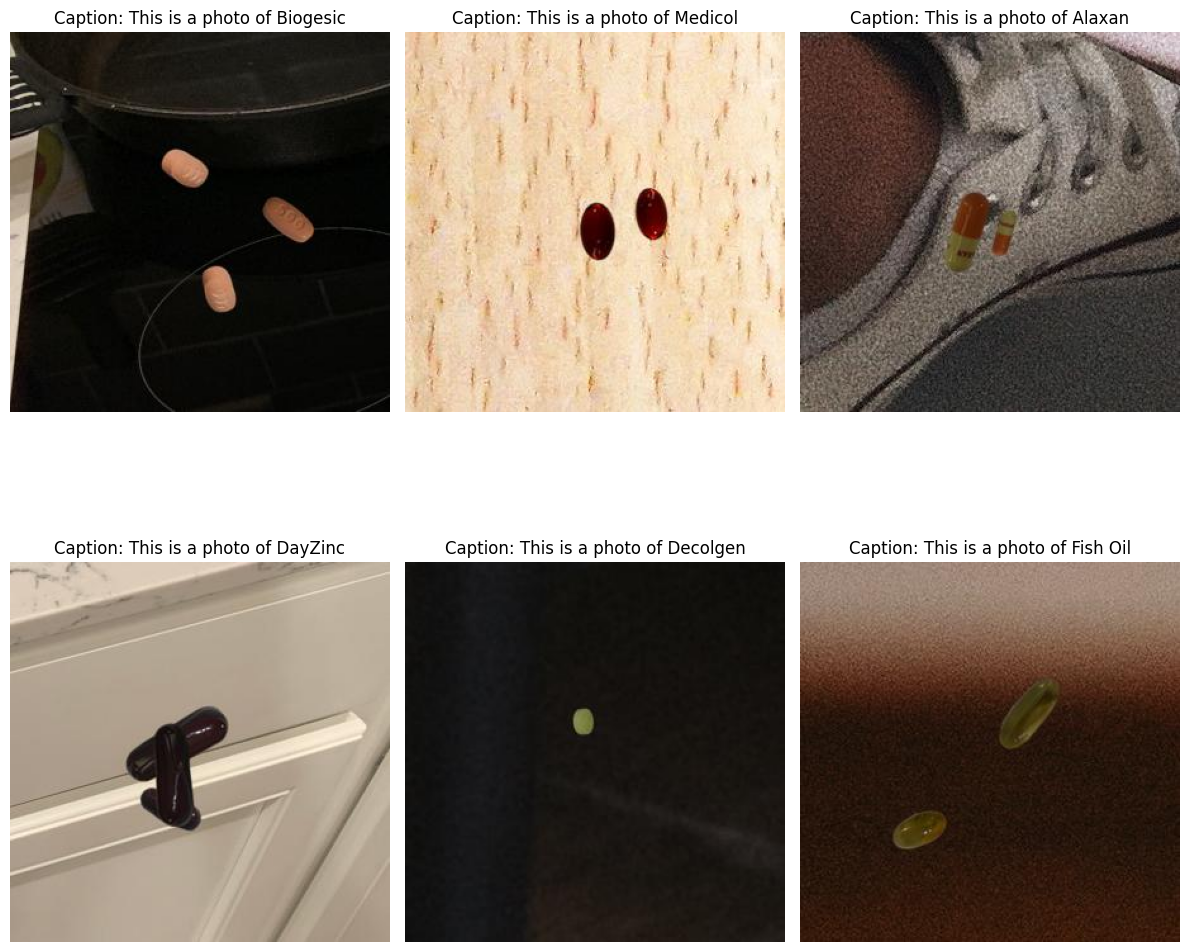

In [ ]:
# Vizualize
selected_images = []
selected_captions = []
used_classes = set()

# Assuming 'images' is a list of tuples (class_name, image_tensor)
for img_tuple in images:
    class_name = img_tuple[0]
    image_tensor = img_tuple[1]
    caption = f"This is a photo of {class_name}"
    if class_name not in used_classes:
        selected_images.append(image_tensor) # Append only the image tensor
        selected_captions.append(caption)
        used_classes.add(class_name)
    if len(used_classes) == 10:
        break

# Take the first 6 selected images and captions for visualization
viz_images = selected_images[:6]
viz_captions = selected_captions[:6]

plt.figure(figsize=(12, 12))
for i in range(len(viz_images)):
    plt.subplot(2, 3, i+1) # Adjust subplot grid as needed
    plt.imshow(viz_images[i]) # Display the image tensor
    plt.title(f"Caption: {viz_captions[i]}")
    plt.axis('off')
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# Performance Metrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Collect all models into a dictionary
models = {
    "Custom CNN": model_1,
    "InceptionV3": model_2,
    "MobileNetV2": model_3,
    "EfficientNetV2B0": model_4
}

# Extract true labels from test dataset
y_true = []
for i in range(len(test_data)):
    _, labels = test_data[i]
    y_true.extend(np.argmax(labels, axis=1))
y_true = np.array(y_true)

# Initialize empty list to store results
results = []

# Calculate performance metrics for each model
for name, model in models.items():
    print(f"Evaluating: {name}")
    y_probs = model.predict(test_data, verbose=0)
    y_pred = np.argmax(y_probs, axis=1)

    # Ensure predictions and true labels have the same length
    min_len = min(len(y_true), len(y_pred))
    y_true_trim = y_true[:min_len]
    y_pred_trim = y_pred[:min_len]
    y_probs_trim = y_probs[:min_len]

    # Calculate ROC-AUC (with exception handling)
    try:
        roc_auc = roc_auc_score(y_true_trim, y_probs_trim, multi_class='ovr', average='weighted')
    except:
        roc_auc = np.nan

    # Append results for the current model
    results.append([
        name,
        accuracy_score(y_true_trim, y_pred_trim),
        precision_score(y_true_trim, y_pred_trim, average='weighted', zero_division=0),
        recall_score(y_true_trim, y_pred_trim, average='weighted', zero_division=0),
        f1_score(y_true_trim, y_pred_trim, average='weighted', zero_division=0),
        roc_auc
    ])

# Convert the results list into a DataFrame
columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
df_metrics = pd.DataFrame(results, columns=columns)

# Display the metrics in a formatted table
display(df_metrics.style.format("{:.2%}", subset=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]))

Evaluating: Custom CNN
Evaluating: InceptionV3
Evaluating: MobileNetV2
Evaluating: EfficientNetV2B0
